# Importing Libraries

We have a data of 2000 images of dogs and cats for training data and 400 for test data. Our aim is to build a CNN model using training data,and predict using test data.
This project consists:
1. Reshaping the images 
2. Rescaling images in the range of 0-1
3. Builing CNN model using training dataset
4. Evaluating model with test data
5. Making Prediction

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load Dataset

In [22]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [23]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


We can see that there are 2000 images in the training dataset and 400 images in the test dataset. Size of each image is 30000. We need to reshape the images into appropriate sizes like (100*100*3). 3 for RGB channel

In [24]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [25]:
X_train[1]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

The pixel value ranges from 0 to 255(RGB values). so,to train the model properly we need to rescale the values from 0 to 1.

In [26]:
X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
X_train[1]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

# printing a random image

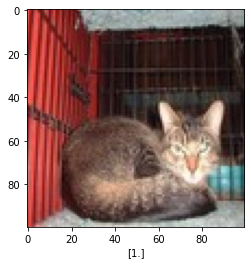

In [28]:
import random
i=random.randint(0,len(X_train))
plt.imshow(X_train[i])
plt.xlabel(Y_train[i])
plt.show()

0-Dog , 1-Cat

# Building Convolutional Neural Network

In [29]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Now we need to pass and fit input data into the model

In [31]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 5s 134ms/step - loss: 0.6771 - accuracy: 0.5555
Epoch 2/5
32/32 [==============================] - 4s 128ms/step - loss: 0.5784 - accuracy: 0.7070
Epoch 3/5
32/32 [==============================] - 4s 114ms/step - loss: 0.4858 - accuracy: 0.7670
Epoch 4/5
32/32 [==============================] - 4s 120ms/step - loss: 0.4190 - accuracy: 0.8135
Epoch 5/5
32/32 [==============================] - 4s 110ms/step - loss: 0.3600 - accuracy: 0.8445


After each epoch loss is decreasing and accuracy is increasing. We are getting 98% accuracy.

# Evaluating the model with test Dataset

In [32]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 14ms/step - loss: 0.7259 - accuracy: 0.6550


[0.7259110808372498, 0.6549999713897705]

# Making Prediction

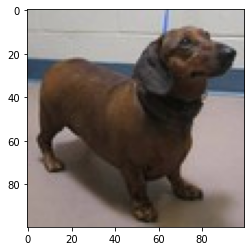

1/1 [==============================] - 0s 98ms/step
Our model says it is a : dog


In [33]:
j = random.randint(0, len(Y_test))
plt.imshow(X_test[j])
plt.show()

y_pred = model.predict(X_test[j].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)